## Lab Assignment 9
## Name: Nihal Patel
## Student ID: 8945100

### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

In [69]:
# We will first import all the necessary libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [70]:
# Now, we will Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [71]:
# Further, we will explore the Fashion MNIST data set
print("The Training data shape is as below:\n", X_train.shape)

The Training data shape is as below:
 (60000, 28, 28)


In [72]:
print("The Testing data shape is as below:\n", X_test.shape)

The Testing data shape is as below:
 (10000, 28, 28)


In [73]:
# We will display the unique classes in form of Numpy array
print("The unique classes in the data set are as below:\n", np.unique(y_train))

The unique classes in the data set are as below:
 [0 1 2 3 4 5 6 7 8 9]


According to the data set, we see that the grayscale images of fashion items in the Fashion MNIST dataset are grouped into ten classes where each and every image is 28X28 pixels which result in total 784 features per every sample. The dataset is frequently used to benchmark machine learning techniques as a drop-in substitute for the conventional MNIST dataset.

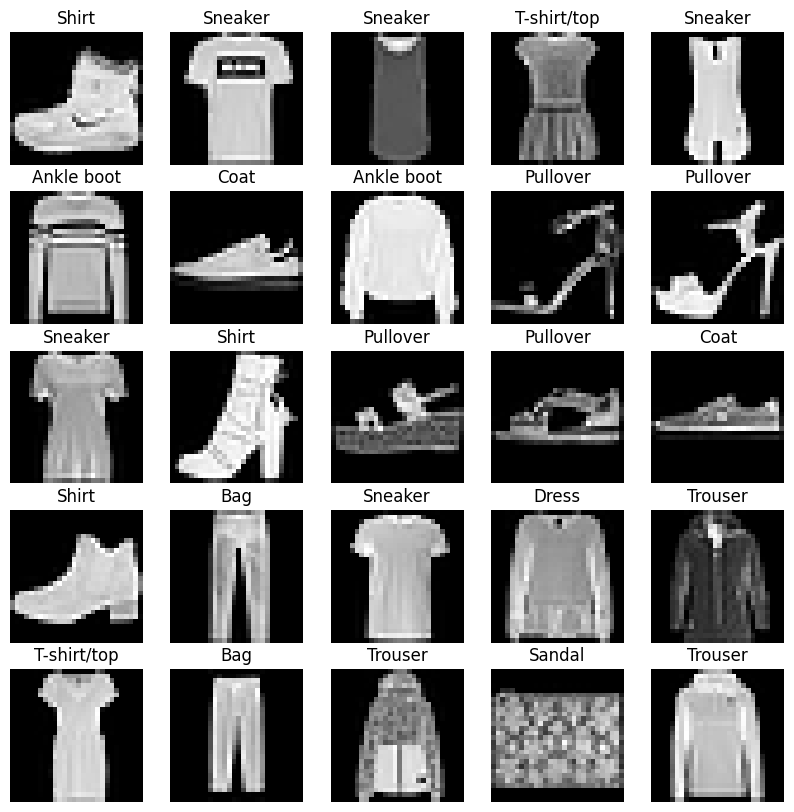

In [74]:
# Now, we will visualize the data set

classNames = ["Sneaker", "Bag", "Ankle boot","T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(classNames[y_train[i]])
    plt.axis('off')
plt.show()

In [75]:
# Further, we will display the class distribution in training set

classDistribution = np.bincount(y_train)
print("The class distribution is as below:\n")
for i, count in enumerate(classDistribution):
    print(f"Class {i}: {count} samples")

The class distribution is as below:

Class 0: 6000 samples
Class 1: 6000 samples
Class 2: 6000 samples
Class 3: 6000 samples
Class 4: 6000 samples
Class 5: 6000 samples
Class 6: 6000 samples
Class 7: 6000 samples
Class 8: 6000 samples
Class 9: 6000 samples


The above class distribution shows that there are 6000 samples for each of the 10 classes, which proves that the Fashion MNIST dataset is well balanced. This type of data set is suitable for training of Machine Learning models.

In [76]:
# Now, we will assume that X_train and X_test are our input data arrays and normalize pixel values to be between 0 and 1
x_train = X_train / 255.0
x_test = X_test / 255.0

# We will also assume that y_train is your target variable array and reshape y_train to match the number of samples in x_train
y_train = y_train.reshape(-1)

# Further, we will split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

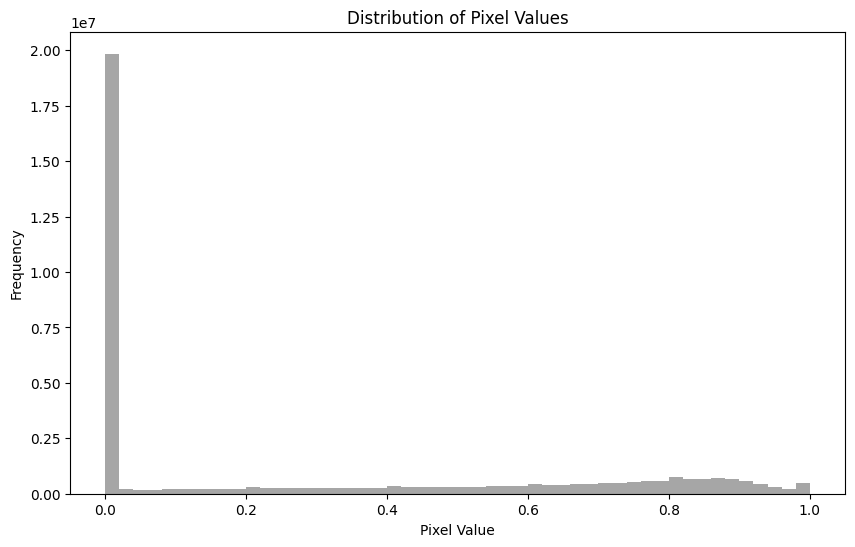

In [77]:
# Further, we will visualize the distribution of pixel values in the dataset
plt.figure(figsize=(10, 6))
plt.hist(x_train.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

The above histogram displays the Distribution of Pixel values within the dataset

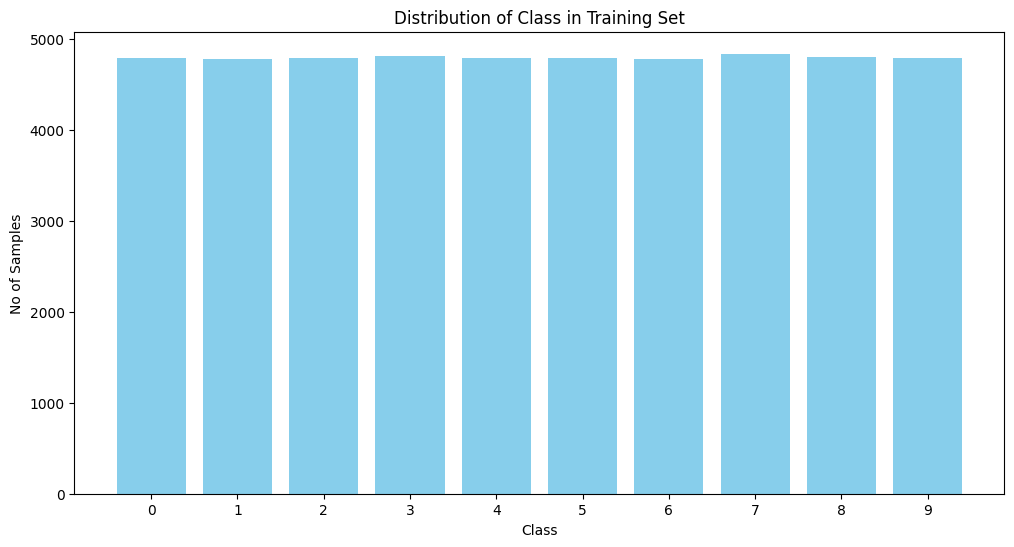

In [78]:
# y_train has been loaded and contains class labels
classDistribution = np.bincount(y_train)

# Now, we will plot the class distribution in the training set
plt.figure(figsize=(12, 6))
plt.bar(range(10), classDistribution, color='skyblue')
plt.title('Distribution of Class in Training Set')
plt.xlabel('Class')
plt.ylabel('No of Samples')
plt.xticks(range(10), [str(i) for i in range(10)])
plt.show()

The above bar chart displays the Distribution of class in training set.

### 2. Train a dense neural network using Keras, try out at least three hyperparameters configurations (2 points)

In [79]:
# First, we will import the necessary components from TensorFlow and Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [80]:
# Now, we will define a function to build a simple neural network model
def buildModel(hidden_units=128, activation='relu'):
    # We will create a Sequential model which will help us to flatten the 28x28 input images
    seqModel = Sequential([Flatten(input_shape=(28, 28)),Dense(hidden_units, activation=activation),Dense(10, activation='softmax')])
    
    # Further, we will compile the model with adam optimizer, sparse_categorical_crossentropy loss function, and metrics
    seqModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    return seqModel

# We will train the model with various hyperparameter configurations
configs = [
    {'hidden_units': 128, 'activation': 'relu'},
    {'hidden_units': 256, 'activation': 'relu'},
    {'hidden_units': 128, 'activation': 'sigmoid'}
]

Histories = []

for config in configs:
    #We will create a neural network model for each configuration, using the build_model function with the specified hyperparameters.
    model = buildModel(hidden_units=config['hidden_units'], activation=config['activation'])
    History = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=0)
    Histories.append(History)

In [82]:
# Further, we will evaluate the models and print the results
for i, (config, history) in enumerate(zip(configs, Histories)):
    # Extracting the trained model from the training history
    model = history.model
    # Making predictions on the test set
    y_pred = np.argmax(model.predict(x_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    confusionMatrix = confusion_matrix(y_test, y_pred)
    
    # Printing the results for the current model configuration
    print(f"\nModel {i + 1} - Configuration:")
    print(f"Hidden Units: {config['hidden_units']}, Activation: {config['activation']}")
    print("Accuracy is as below:", accuracy)
    print("Confusion Matrix is as below:\n")
    print(confusionMatrix)

313/313 [==============================] - 0s 1ms/step

Model 1 - Configuration:
Hidden Units: 128, Activation: relu
Accuracy is as below: 0.8729
Confusion Matrix is as below:

[[889   0  11  16  10   0  69   0   5   0]
 [  7 959   0  22  10   0   1   0   1   0]
 [ 19   0 711   6 209   0  54   0   1   0]
 [ 31   2  15 858  74   0  16   0   4   0]
 [  1   0  40  12 930   0  16   0   1   0]
 [  0   0   0   1   0 969   0  20   0  10]
 [178   0  74  23 176   0 542   0   7   0]
 [  0   0   0   0   0  14   0 965   0  21]
 [  7   0   3   4  11   2   3   5 965   0]
 [  0   1   0   0   0  14   1  43   0 941]]
313/313 [==============================] - 0s 1ms/step

Model 2 - Configuration:
Hidden Units: 256, Activation: relu
Accuracy is as below: 0.8848
Confusion Matrix is as below:

[[875   2  21  12   4   2  80   0   4   0]
 [  4 969   1  18   3   0   5   0   0   0]
 [ 17   0 851   7  73   0  52   0   0   0]
 [ 29   4  20 888  27   0  27   0   4   1]
 [  0   0 126  37 757   0  80   0   0   0]


In [83]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
results = []

# We will evaluate the models and print the results
for i, (config, history) in enumerate(zip(configs, Histories)):

    model = history.model
    
    y_pred = np.argmax(model.predict(x_test), axis=1)
    
    # Now , we will calculate the accuracy, confusion matrix, and classification report
    accuracy = accuracy_score(y_test, y_pred)
    confusionMatrix = confusion_matrix(y_test, y_pred)
    classificationReport = classification_report(y_test, y_pred, target_names=classNames)
    
    # We will collect all the  results for each and every configuration
    results.append({
        'config': config,
        'accuracy': accuracy,
        'confusion_matrix': confusionMatrix,
        'classification_report': classificationReport,
        'misclassified_examples': [(i, true, pred) for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
    })

# Now, we will choose the best configuration and report the results for best configuration
bestResult = max(results, key=lambda x: x['accuracy'])

print("\n")
print("Best Configuration is as below:\n")
print(f"Hidden Units: {bestResult['config']['hidden_units']}, Activation: {bestResult['config']['activation']}")
print("Accuracy:", bestResult['accuracy'])
print("\n")
print("Confusion Matrix:")
print(bestResult['confusion_matrix'])
print("\n")
print("Classification Report:")
print(bestResult['classification_report'])

# We will also display some of the specific examples of incorrect classification
print("\nBelow are the examples of Incorrect Classification:")
for i, true_label, predicted_label in bestResult['misclassified_examples'][:5]:
    print(f"Example {i + 1}: True label - {classNames[true_label]}, Predicted label - {classNames[predicted_label]}")

313/313 [==============================] - 0s 1ms/step


Best Configuration is as below:

Hidden Units: 256, Activation: relu
Accuracy: 0.8848


Confusion Matrix:
[[875   2  21  12   4   2  80   0   4   0]
 [  4 969   1  18   3   0   5   0   0   0]
 [ 17   0 851   7  73   0  52   0   0   0]
 [ 29   4  20 888  27   0  27   0   4   1]
 [  0   0 126  37 757   0  80   0   0   0]
 [  0   0   0   0   0 966   0  18   0  16]
 [141   0 109  17  59   0 671   0   3   0]
 [  0   0   0   0   0  15   0 972   1  12]
 [  5   0   8   5   2   3   7   3 967   0]
 [  0   0   0   0   0   8   1  59   0 932]]


Classification Report:
              precision    recall  f1-score   support

     Sneaker       0.82      0.88      0.85      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.75      0.85      0.80      1000
 T-shirt/top       0.90      0.89      0.90      1000
     Trouser       0.82      0.76      0.79      1000
    Pullover       0.97      0.97      0.97      1000
  

As per the above result, we can get to know that the best configuration for the dense neural network has 256 hidden units with the ReLU activation function. It has the accuracy of 0.8848. There is a detailed information of models performance displayed by the Confusion Matrix. 
The classes with high precision and recall with effective classification are as below:<br>
1. Trouser <br>
2. Sandal <br>
3. Sneaker <br>
4. Bag <br>
5. Ankle boot <br>

The classes having slightly low precesion call are as below:<br>
1. Shirt <br>
2. Pullover <br>

According to the output, we see that some classes show incorrect classifications: <br>
True label - Coat, Predicted label - Pullover <br>
True label - Trouser, Predicted label - Ankle boot <br>
True label - Shirt, Predicted label - Pullover <br>
True label - Trouser, Predicted label - Ankle boot <br>
True label - T-shirt/top, Predicted label - Dress <br>